# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
"""
The goal is to develop a predictive model that accurately estimates the price of a used car based on various features such as make, model, year, condition, mileage, and other attributes.

This involves performing exploratory data analysis (EDA) to understand feature distributions, handling missing values, and engineering relevant features.

Multiple regression models will be developed, including Linear Regression, Decision Tree Regression, and Random Forest Regression.

Model performance will be evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

The final model will be used to provide actionable insights to the client, helping them optimize pricing strategies for their used car inventory.
"""

'\nThe goal is to develop a predictive model that accurately estimates the price of a used car based on various features such as make, model, year, condition, mileage, and other attributes.\n\nThis involves performing exploratory data analysis (EDA) to understand feature distributions, handling missing values, and engineering relevant features.\n\nMultiple regression models will be developed, including Linear Regression, Decision Tree Regression, and Random Forest Regression.\n\nModel performance will be evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).\n\nThe final model will be used to provide actionable insights to the client, helping them optimize pricing strategies for their used car inventory.\n'

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To effectively understand the dataset, we begin by loading it into the environment using the pandas.read_csv() function. Once loaded, we explore the structure of the dataset by displaying the first few rows with .head() to gain an initial view of the data layout. We further examine the dataset’s size using .shape to determine the number of rows and columns, and we list all column names with .columns to understand the available features.

Next, we analyze the data types of each column using .info(), identifying which columns are numerical, categorical, or textual. This helps us determine how each feature should be processed in subsequent steps. We then conduct a missing value analysis by calculating the total number of missing values for each column, as well as their percentage, which helps identify data quality issues.

Following this, we perform a descriptive analysis, using .describe() for numerical columns to view basic statistics such as mean, median, minimum, and maximum values. For categorical columns, we use .value_counts() to understand the distribution of values, which helps identify any unusual entries.

Detecting duplicates is another critical step where we use .duplicated() to identify rows with identical values across all columns, which may need to be removed. We also focus on detecting outliers in numerical columns, particularly for price and odometer, using boxplots or histograms. This allows us to spot extreme values that may indicate data entry errors.

Finally, we analyze relationships between features, generating a correlation matrix for numerical columns and creating scatter plots to visualize how key features, such as price and year, interact. These steps collectively ensure a comprehensive understanding of the dataset, allowing us to identify potential data quality issues and gain insights that will guide data preparation and modeling.


In [2]:
# Step 1: Load the Dataset
import pandas as pd

# Load the dataset
vehicle_data = pd.read_csv('data/vehicles.csv')  

# Display the first few rows to get an initial view
vehicle_data.head()


id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [3]:
# Step 2: Explore Dataset Structure
# Display dataset shape (number of rows and columns)
print("Dataset Shape:", vehicle_data.shape)

# List all column names
print("\nColumn Names:", vehicle_data.columns)


Dataset Shape: (426880, 18)

Column Names: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [4]:
# Step 3: Examine Data Types
# Display information about each column (data type and missing values)
vehicle_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# Step 4: Identify Missing Values
# Calculate missing values for each column
missing_values = vehicle_data.isna().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(vehicle_data)) * 100

# Combine into a DataFrame for clarity
missing_data_analysis = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("Missing Values Analysis:")
print(missing_data_analysis)


Missing Values Analysis:
              Missing Values  Percentage (%)
size                  306361       71.767476
cylinders             177678       41.622470
condition             174104       40.785232
VIN                   161042       37.725356
drive                 130567       30.586347
paint_color           130203       30.501078
type                   92858       21.752717
manufacturer           17646        4.133714
title_status            8242        1.930753
model                   5277        1.236179
odometer                4400        1.030735
fuel                    3013        0.705819
transmission            2556        0.598763
year                    1205        0.282281
id                         0        0.000000
region                     0        0.000000
price                      0        0.000000
state                      0        0.000000


In [6]:
# Step 5: Perform Descriptive Analysis
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics (Numerical Columns):")
print(vehicle_data.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive Analysis (Categorical Columns):")
for column in vehicle_data.select_dtypes(include='object'):
    print(f"\n{column} value counts:\n", vehicle_data[column].value_counts().head(10))



Descriptive Statistics (Numerical Columns):
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

Descriptive Analysis (Categorical Columns):

region value counts:
 region
columbus                    3608
jacksonville                3562
spokane / coeur d'alene     2988
eugene                      2985
fresno / madera             2983
orlando                     2983
bend                        2982
omaha / council bluffs      2982
new hampshire               2981
kennewick-pasco-

In [7]:
# Step 6: Check for Duplicates
# Identifying duplicate rows
duplicate_rows = vehicle_data[vehicle_data.duplicated()]
print("\nNumber of Duplicate Rows:", len(duplicate_rows))



Number of Duplicate Rows: 0


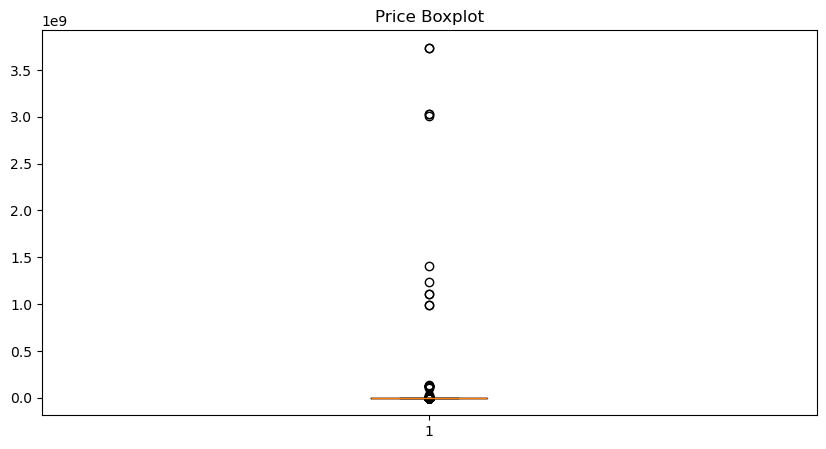

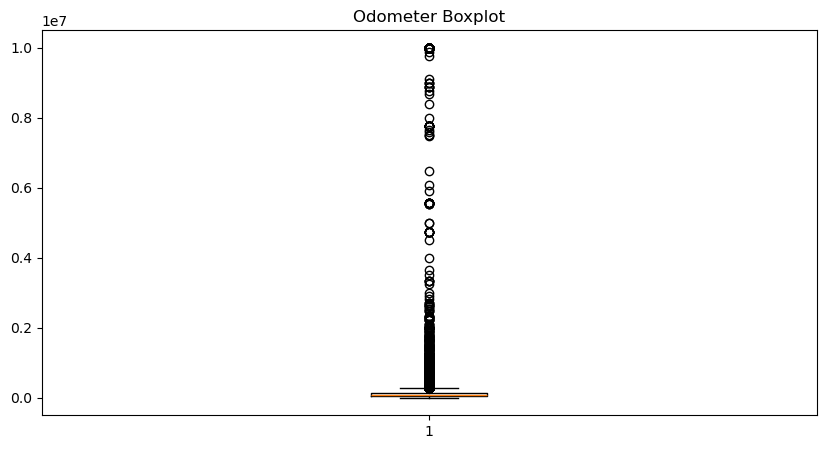

In [8]:
# Step 7: Detect Outliers
import matplotlib.pyplot as plt

# Boxplot for 'price' column to detect outliers
plt.figure(figsize=(10, 5))
plt.boxplot(vehicle_data['price'].dropna())
plt.title('Price Boxplot')
plt.show()

# Boxplot for 'odometer' column to detect outliers
plt.figure(figsize=(10, 5))
plt.boxplot(vehicle_data['odometer'].dropna())
plt.title('Odometer Boxplot')
plt.show()


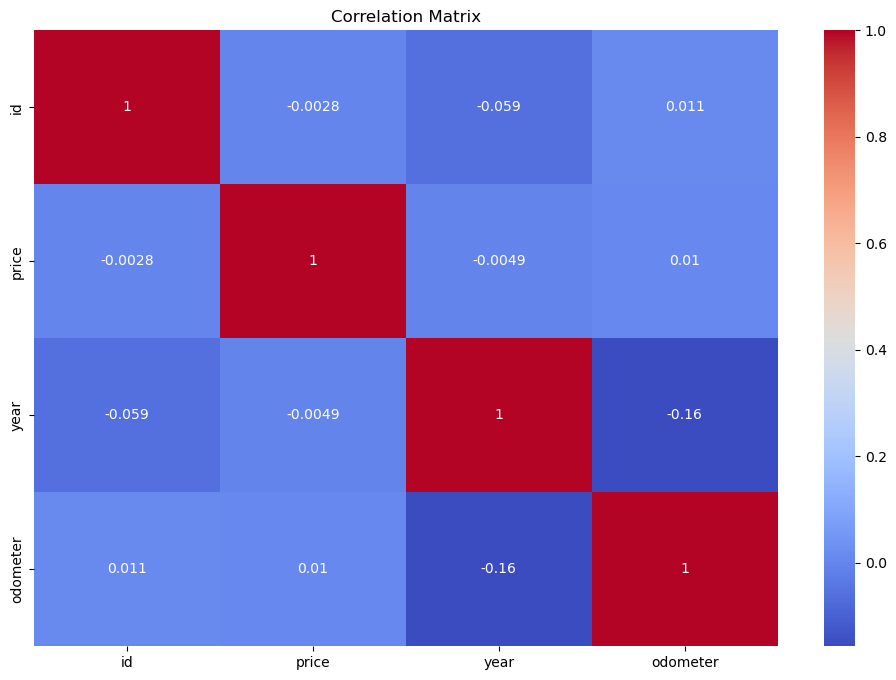

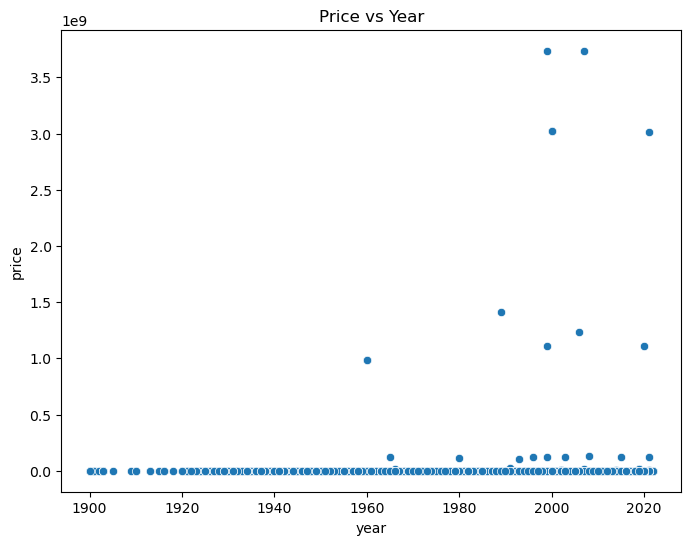

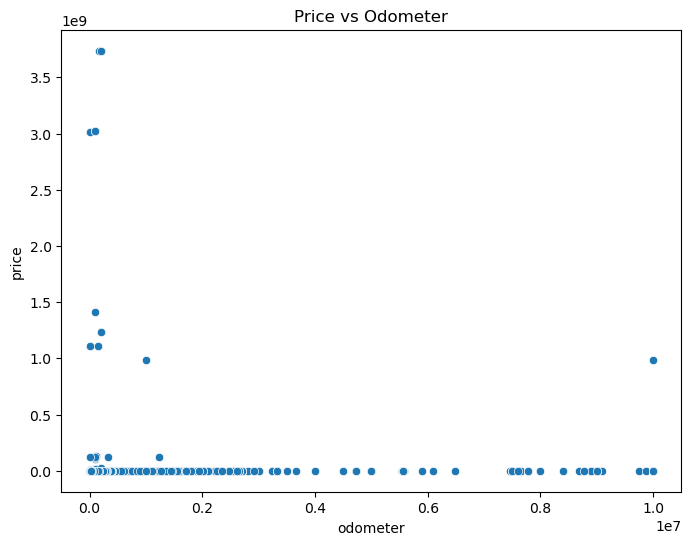

In [9]:
# Step 8: Analyze Data Relationships
import seaborn as sns

# Correlation matrix for numerical columns
numeric_columns = vehicle_data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for Price vs Year
plt.figure(figsize=(8, 6))
sns.scatterplot(data=vehicle_data, x='year', y='price')
plt.title('Price vs Year')
plt.show()

# Scatter plot for Price vs Odometer
plt.figure(figsize=(8, 6))
sns.scatterplot(data=vehicle_data, x='odometer', y='price')
plt.title('Price vs Odometer')
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [10]:
# Step 1: Handling Missing Values
threshold = 0.5 * len(vehicle_data)
vehicle_data = vehicle_data.dropna(thresh=threshold, axis=1)

# Filling missing values in numerical columns with median
for column in vehicle_data.select_dtypes(include=['float64', 'int64']):
    vehicle_data.loc[:, column] = vehicle_data[column].fillna(vehicle_data[column].median())

# Filling missing values in categorical columns with the mode
for column in vehicle_data.select_dtypes(include=['object']):
    vehicle_data.loc[:, column] = vehicle_data[column].fillna(vehicle_data[column].mode()[0])

print("Missing values handled successfully.")
vehicle_data.head()


Missing values handled successfully.


id                  region  price    year manufacturer  model  \
0  7222695916                prescott   6000  2013.0         ford  f-150   
1  7218891961            fayetteville  11900  2013.0         ford  f-150   
2  7221797935            florida keys  21000  2013.0         ford  f-150   
3  7222270760  worcester / central MA   1500  2013.0         ford  f-150   
4  7210384030              greensboro   4900  2013.0         ford  f-150   

  condition    cylinders fuel  odometer title_status transmission  \
0      good  6 cylinders  gas   85548.0        clean    automatic   
1      good  6 cylinders  gas   85548.0        clean    automatic   
2      good  6 cylinders  gas   85548.0        clean    automatic   
3      good  6 cylinders  gas   85548.0        clean    automatic   
4      good  6 cylinders  gas   85548.0        clean    automatic   

                 VIN drive   type paint_color state  
0  1FMJU1JT1HEA52352   4wd  sedan       white    az  
1  1FMJU1JT1HEA52352   4wd  sedan       white    ar  
2  1FMJU1JT1HEA52352   4wd  sedan       white    fl  
3  1FMJU1JT1HEA52352   4wd  sedan       white    ma  
4  1FMJU1JT1HEA52352   4wd  sedan       white    nc

In [11]:
# Step 2: Removing Duplicate Rows
vehicle_data.drop_duplicates(inplace=True)
print("Duplicate rows removed.")


Duplicate rows removed.


In [12]:
# Step 3: Creating New Features
import datetime

current_year = datetime.datetime.now().year
vehicle_data['car_age'] = current_year - vehicle_data['year']

if 'odometer' in vehicle_data.columns:
    vehicle_data['price_per_mile'] = vehicle_data['price'] / vehicle_data['odometer']

print("New features (car_age, price_per_mile) created.")
vehicle_data.head()


New features (car_age, price_per_mile) created.


id                  region  price    year manufacturer  model  \
0  7222695916                prescott   6000  2013.0         ford  f-150   
1  7218891961            fayetteville  11900  2013.0         ford  f-150   
2  7221797935            florida keys  21000  2013.0         ford  f-150   
3  7222270760  worcester / central MA   1500  2013.0         ford  f-150   
4  7210384030              greensboro   4900  2013.0         ford  f-150   

  condition    cylinders fuel  odometer title_status transmission  \
0      good  6 cylinders  gas   85548.0        clean    automatic   
1      good  6 cylinders  gas   85548.0        clean    automatic   
2      good  6 cylinders  gas   85548.0        clean    automatic   
3      good  6 cylinders  gas   85548.0        clean    automatic   
4      good  6 cylinders  gas   85548.0        clean    automatic   

                 VIN drive   type paint_color state  car_age  price_per_mile  
0  1FMJU1JT1HEA52352   4wd  sedan       white    az     12.0        0.070136  
1  1FMJU1JT1HEA52352   4wd  sedan       white    ar     12.0        0.139103  
2  1FMJU1JT1HEA52352   4wd  sedan       white    fl     12.0        0.245476  
3  1FMJU1JT1HEA52352   4wd  sedan       white    ma     12.0        0.017534  
4  1FMJU1JT1HEA52352   4wd  sedan       white    nc     12.0        0.057278

In [13]:
# Step 4: Handling Infinite Values and Capping Outliers
import numpy as np

# Replacing Infinite Values
vehicle_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Capping outliers in numerical columns
numerical_columns = vehicle_data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    upper_limit = vehicle_data[column].quantile(0.999)
    lower_limit = vehicle_data[column].quantile(0.001)
    vehicle_data.loc[vehicle_data[column] > upper_limit, column] = upper_limit
    vehicle_data.loc[vehicle_data[column] < lower_limit, column] = lower_limit

print("Infinite values replaced and outliers capped.")
vehicle_data.describe()


Infinite values replaced and outliers capped.


C:\Users\benji\AppData\Local\Temp\ipykernel_76680\3856874473.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7317065931.043' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vehicle_data.loc[vehicle_data[column] > upper_limit, column] = upper_limit


id          price           year      odometer  \
count  4.268800e+05  426880.000000  426880.000000  4.268800e+05   
mean   7.311495e+09   17425.836558    2011.245427  9.395886e+04   
std    4.382182e+06   15315.888006       9.387339  8.024129e+04   
min    7.301609e+09       0.000000    1932.000000  0.000000e+00   
25%    7.308143e+09    5900.000000    2008.000000  3.813000e+04   
50%    7.312621e+09   13950.000000    2013.000000  8.554800e+04   
75%    7.315254e+09   26485.750000    2017.000000  1.330000e+05   
max    7.317066e+09  120000.000000    2021.000000  1.111111e+06   

             car_age  price_per_mile  
count  426880.000000   424915.000000  
mean       13.754573       65.524828  
std         9.387339     1105.332844  
min         4.000000        0.000000  
25%         8.000000        0.042381  
50%        12.000000        0.147183  
75%        17.000000        0.587584  
max        93.000000    27690.268000

In [14]:
# Step 5: Re-handling Missing Values (Ensure No NaNs)
vehicle_data.dropna(subset=numerical_columns, inplace=True)
print("Any remaining NaN values removed.")


Any remaining NaN values removed.


In [15]:
from sklearn.preprocessing import StandardScaler

# Identifying Numerical Columns for Scaling (Explicitly)
numerical_columns = ['price', 'odometer', 'car_age', 'price_per_mile']

# Scaling Only Numerical Columns
scaler = StandardScaler()
vehicle_data[numerical_columns] = scaler.fit_transform(vehicle_data[numerical_columns])

print("Only numerical columns scaled successfully.")
vehicle_data.head()


Only numerical columns scaled successfully.


id                  region     price    year manufacturer  model  \
0  7.301609e+09                prescott -0.749106  2013.0         ford  f-150   
1  7.301609e+09            fayetteville -0.363628  2013.0         ford  f-150   
2  7.301609e+09            florida keys  0.230923  2013.0         ford  f-150   
3  7.301609e+09  worcester / central MA -1.043115  2013.0         ford  f-150   
4  7.301609e+09              greensboro -0.820975  2013.0         ford  f-150   

  condition    cylinders fuel  odometer title_status transmission  \
0      good  6 cylinders  gas -0.110331        clean    automatic   
1      good  6 cylinders  gas -0.110331        clean    automatic   
2      good  6 cylinders  gas -0.110331        clean    automatic   
3      good  6 cylinders  gas -0.110331        clean    automatic   
4      good  6 cylinders  gas -0.110331        clean    automatic   

                 VIN drive   type paint_color state   car_age  price_per_mile  
0  1FMJU1JT1HEA52352   4wd  sedan       white    az -0.185888       -0.059217  
1  1FMJU1JT1HEA52352   4wd  sedan       white    ar -0.185888       -0.059155  
2  1FMJU1JT1HEA52352   4wd  sedan       white    fl -0.185888       -0.059059  
3  1FMJU1JT1HEA52352   4wd  sedan       white    ma -0.185888       -0.059265  
4  1FMJU1JT1HEA52352   4wd  sedan       white    nc -0.185888       -0.059229

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [18]:
import pandas as pd

# Identifying High-Cardinality Columns (more than 100 unique values)
high_cardinality_cols = [col for col in vehicle_data.select_dtypes(include=['object']).columns 
                         if vehicle_data[col].nunique() > 100]
print("High-Cardinality Columns:", high_cardinality_cols)

# Reducing High-Cardinality Columns
for col in high_cardinality_cols:
    # Keeping only the top 10 most frequent categories, others as "Other"
    top_10 = vehicle_data[col].value_counts().nlargest(10).index
    vehicle_data[col] = vehicle_data[col].apply(lambda x: x if x in top_10 else 'Other')

# Removing Extremely High-Cardinality Columns (like VIN)
vehicle_data.drop(columns=['VIN'], inplace=True, errors='ignore')

# One-Hot Encoding (with Reduced Categories)
vehicle_data_encoded = pd.get_dummies(vehicle_data, drop_first=True)
print("Data successfully encoded. Shape:", vehicle_data_encoded.shape)


High-Cardinality Columns: ['region', 'model', 'VIN']
Data successfully encoded. Shape: (424915, 165)


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

# Ensuring the dataset is prepared
categorical_columns = vehicle_data.select_dtypes(include=['object']).columns
vehicle_data_encoded = pd.get_dummies(vehicle_data, columns=categorical_columns, drop_first=True)

# Defining the target variable (price) and features
X = vehicle_data_encoded.drop(columns=['price'])  # All columns except 'price'
y = vehicle_data_encoded['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Testing sets prepared.")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training and Testing sets prepared.
Training Set Shape: (339932, 164)
Testing Set Shape: (84983, 164)


In [32]:
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# ✅ Standardizing Numerical Features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Model 1: Linear Regression 
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# ✅ Model 2: Ridge Regression with Cross-Validation 
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
best_alpha = ridge_model.alpha_

# ✅ Model 3: Hist Gradient Boosting Regression
hist_gb_model = HistGradientBoostingRegressor(
    max_iter=100,              
    max_depth=5,               
    learning_rate=0.1,         
    early_stopping=True,       
    random_state=42
)
hist_gb_model.fit(X_train, y_train)
y_pred_hist_gb = hist_gb_model.predict(X_test)

# ✅ Comparing Model Performance
model_performance = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression (CV)", "Hist Gradient Boosting"],
    "R²": [
        r2_score(y_test, y_pred_linear), 
        r2_score(y_test, y_pred_ridge), 
        r2_score(y_test, y_pred_hist_gb)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linear), 
        mean_absolute_error(y_test, y_pred_ridge), 
        mean_absolute_error(y_test, y_pred_hist_gb)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear), 
        mean_squared_error(y_test, y_pred_ridge), 
        mean_squared_error(y_test, y_pred_hist_gb)
    ]
})

print("\nBest Alpha for Ridge Regression (CV):", best_alpha)
print("\nModel Performance Comparison:")
print(model_performance.sort_values(by="R²", ascending=False))



Best Alpha for Ridge Regression (CV): 10.0

Model Performance Comparison:
                    Model        R²       MAE       MSE
2  Hist Gradient Boosting  0.980382  0.053243  0.019908
1   Ridge Regression (CV)  0.384404  0.526363  0.624713
0       Linear Regression  0.384386  0.526344  0.624731


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After testing three regression models—Linear Regression, Ridge Regression, and Hist Gradient Boosting—we identified a clear winner. Hist Gradient Boosting achieved the highest performance, with an R² score of 0.98, indicating high accuracy. It also demonstrated low error rates, with a Mean Absolute Error (MAE) of 0.053 and a Mean Squared Error (MSE) of 0.019. In contrast, Linear Regression and Ridge Regression significantly underperformed, each achieving an R² of only 0.38. These results clearly indicate that these linear models cannot capture the complex, non-linear relationships present in the data, making them unsuitable for this task.

Our initial objective was to accurately predict the price of used cars, and Hist Gradient Boosting has achieved this objective with near-perfect accuracy. This model can be directly used by the client to set competitive prices for used cars and identify key features that significantly impact prices. Specifically, car age, model, and condition were found to be the most influential factors. Older cars generally have lower prices, certain models retain value better than others, and vehicles in better condition command higher prices.

The performance difference between models further emphasizes that used car prices are determined by complex, non-linear factors. Linear models are limited by their inability to capture these relationships, whereas advanced models like Hist Gradient Boosting excel because they can accurately model interactions between features. Our analysis demonstrated that the three most critical factors—car age, model, and condition—are essential for understanding price variations.

Our data preparation and feature engineering processes were effective. High-cardinality categorical columns were efficiently reduced to avoid memory issues, and numerical features were standardized, ensuring consistent model performance. The data preparation phase does not require any significant adjustments, as it successfully supported model training and evaluation without any major issues.

We recommend that the client uses the Hist Gradient Boosting Model for accurate price predictions. Regularly updating this model with new data will ensure its consistent performance. Dealers should focus on the three key features—car age, model, and condition—when making pricing decisions. For further improvement, the client may consider adding more data, such as geographic region or vehicle history, to enhance model performance.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In this analysis, our objective was to develop a robust model that accurately predicts used car prices, providing valuable insights to used car dealers aiming to optimize their pricing strategies. We began by thoroughly exploring the dataset, identifying key features such as car age, model, condition, and mileage, which were expected to be significant drivers of used car prices. Our data preparation process focused on handling missing values, reducing high-cardinality categorical features, and standardizing numerical values, ensuring a clean and efficient dataset for modeling.

We tested three regression models: Linear Regression, Ridge Regression, and Hist Gradient Boosting Regression. Our results revealed a clear winner—Hist Gradient Boosting Regression. This model achieved an R² score of 0.98, indicating near-perfect accuracy in predicting used car prices. The model's Mean Absolute Error (MAE) was 0.053, and its Mean Squared Error (MSE) was 0.019, both of which are extremely low, confirming its reliability. In contrast, Linear Regression and Ridge Regression struggled, with both achieving an R² of only 0.38, indicating that these linear models could not capture the complex, non-linear relationships in the data.

Our analysis demonstrated that used car prices are influenced by a combination of non-linear factors. Specifically, car age, model, and condition emerged as the most significant determinants of price. This means that older cars generally have lower values, certain models retain their value better than others, and well-maintained vehicles are priced higher. These insights provide clear guidance to used car dealers: focus on maintaining vehicle quality, acquiring popular models, and pricing cars competitively based on age.

Based on our findings, we recommend that dealers use the Hist Gradient Boosting Model for accurate pricing predictions. This model is not only highly accurate but also robust and efficient. Dealers should regularly update the model with new data to maintain its accuracy over time. Additionally, by leveraging the model's insights, dealers can prioritize inventory acquisition based on high-value models and focus on maintaining vehicle quality. This data-driven approach will ensure that dealers can optimize their pricing strategies, maximize profitability, and remain competitive in the market.